# Import Libraries

In [1]:
import numpy as np 

import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random
from numpy import *  
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr

# Functions

## Get Data

In [2]:
def get_data(normalise, i): 

    data_in = genfromtxt('C:/Dropbox/Variance/UNSW/ZZSC5836/raw_data/energydata.csv', delimiter=",") # in case of csv data
 

    #data_inputx = data_in[:,0:8] # all features 0, - 7
    #data_inputx = data_in[:,[1]]  # one feature
    data_inputx = data_in[:,[0,3]]  # two features   

    if normalise == True:
        transformer = Normalizer().fit(data_inputx)  # fit does nothing.
        data_inputx = transformer.transform(data_inputx)
 

    #cov_mat = np.cov(data_in.T)

    corr_mat = np.corrcoef(data_in.T)

    print(corr_mat[:,8], ' is the corr matrix of the data read')

    plt.imshow(corr_mat, cmap='hot', interpolation='nearest') 
    plt.colorbar()
    fig1 = plt.gcf()
    #plt.clf()
    

    data_inputy = data_in[:,8] # this is target - so that last col is selected from data

    percent_test = 0.4
    '''testsize = int(percent_test * data_inputx.shape[0]) 
    x_train = data_inputx[:-testsize]
    x_test = data_inputx[-testsize:] 
    y_train = data_inputy[:-testsize]
    y_test = data_inputy[-testsize:]'''


      #another way you can use scikit-learn train test split with random state
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=percent_test, random_state=i)

    return x_train, x_test, y_train, y_test, fig1

## Models

In [3]:
def scikit_linear_mod(x_train, x_test, y_train, y_test): 
 
    regr = linear_model.LinearRegression()

 
    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    rsquared = r2_score(y_test, y_pred) 
 
    '''residuals = y_pred - y_test
    plt.plot(residuals, linewidth=1)
 
    plt.savefig('scikit_linear.png')'''

    return rmse, rsquared, regr.coef_


# Main / Output

[ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]  is the corr matrix of the data read


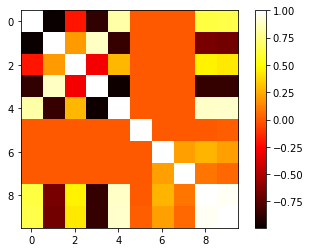

[4.71381003]
[0.77956739]
4.713810034397809 0.0  mean_rmse std_rmse
0.7795673875287817 0.0  mean_rsq std_rsq


In [4]:
# Run Main

normalise = False
 
max_exp = 1

rmse_list = np.zeros(max_exp)
rsq_list = np.zeros(max_exp)

for i in range(0,max_exp):
    
    x_train, x_test, y_train, y_test, fig1 = get_data(normalise, i)
    rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
    
    rmse_list[i] = rmse
    rsq_list[i] = rsquared 
    
plt.show()

print(rmse_list)
# Explained variance score: 1 is perfect prediction 
print(rsq_list)

mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)

mean_rsq = np.mean(rsq_list)
std_rsq = np.std(rsq_list)

print(mean_rmse, std_rmse, ' mean_rmse std_rmse')

print(mean_rsq, std_rsq, ' mean_rsq std_rsq')

In [8]:
plt.show()